Laboratorio 2 Grupo 1
Nombre: César Luis Vargas Lezano

Regresión Lineal Multivariable

## Acerca del dataset 
De los datos:
* price: Precio de la casa
* bedrooms: Número de dormitorios.
* bathrooms: Número de baños, donde 0.5 representa un baño con solo un inodoro.
* sqft_living: Metros cuadrados del espacio habitable interior.
* sqft_lot: Metros cuadrados del terreno.
* floors: Número de pisos.
* waterfront: Variable binaria que indica si la casa tiene vista al agua.
* view: Índice de 0 a 4 que indica la calidad de la vista de la propiedad (0 = Sin vista, 1 = Regular, 2 = Promedio, 3 = Buena, 4 = Excelente).
* condition: Índice de 1 a 5 que indica la condición de la casa (1 = Pobre, 2 = Regular, 3 = Promedio, 4 = Buena, 5 = Muy buena).
* grade: Índice de 1 a 13 que indica la calidad de la construcción y el diseño (1-3 = Baja calidad, 7 = Calidad promedio, 11-13 = Alta calidad).
* sqft_above: Metros cuadrados del espacio habitable sobre el nivel del suelo.
* sqft_basement: Metros cuadrados del espacio habitable bajo el nivel del suelo.
* yr_built: Año en que se construyó la casa.
* yr_renovated: Año de la última renovación de la casa.
* zipcode: Código postal de la ubicación de la casa.
* lat: Latitud.
* long: Longitud.
* sqft_living15: Metros cuadrados del espacio habitable interior de los 15 vecinos más cercanos.
* sqft_lot15: Metros cuadrados del terreno de los 15 vecinos más cercanos.

In [473]:
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráfivos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# llama a maltplotlib a embeber gráficas dentro de los cuadernillos
%matplotlib inline

# uso de pandas para la lectura de archivos (dataset)
import pandas as pd

from datetime import datetime

In [474]:
#Cargado de dataset
data = pd.read_csv('./kc_house_data.csv')

In [475]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Analizando el Dataset , se verifica que hay columnas que no se usarian directamente o de pronto no serian relevantes para el modelo como "id" y "date"

In [477]:
data = data.drop(['id', 'date'], axis=1)

Verificando si se elmino correctamente

In [478]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ahora se puede continuar de manera normal con el procesos para realizar la regresion lineal, de la siguiente manera.

In [479]:
# Lectura de datos 
X = data.iloc[:, 1:19]
y = data.iloc[:, 0]
m = y.size

In [480]:
X.shape

(21613, 18)

In [481]:
print(X.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340   

In [482]:
print(y.head())

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


# función normaliza las características de una matriz X para que cada característica tenga una media de 0 y una desviación estándar de 1, lo cual es útil para algoritmos de aprendizaje automático.

In [483]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# para verificar que la normalización de las características se ha realizado correctamente y para ver los valores de la media y la desviación estándar utilizados en el proceso de normalización.

In [484]:
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [485]:
print(X_norm.head())

   bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   -0.087173 -0.305759   
1 -0.398737   0.175607     0.533634 -0.189885  0.936506   -0.087173 -0.305759   
2 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   -0.087173 -0.305759   
3  0.676485   1.149449    -0.130550 -0.244014 -0.915427   -0.087173 -0.305759   
4 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   -0.087173 -0.305759   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0  -0.629187 -0.558836   -0.734708      -0.658681 -0.544898     -0.210128   
1  -0.629187 -0.558836    0.460841       0.245141 -0.681079      4.746678   
2  -0.629187 -1.409587   -1.229834      -0.658681 -1.293892     -0.210128   
3   2.444294 -0.558836   -0.891699       1.397515 -0.204446     -0.210128   
4  -0.629187  0.291916   -0.130895      -0.658681  0.544548     -0.210128   

    zipcode       lat      long  sqft_living15  sq

# la función graficarDatos crea una gráfica de dispersión con los datos proporcionados y añade etiquetas a los ejes.

In [486]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [488]:
X_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
dtypes: flo

#  crea varias gráficas de dispersión para visualizar la relación entre diferentes características de una casa (como el tamaño del terreno, la zona habitable y la casa excluyendo el sótano) y el costo del terreno.

C:\Users\cesar\AppData\Local\Temp\ipykernel_8116\2800235436.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pyplot.figure()


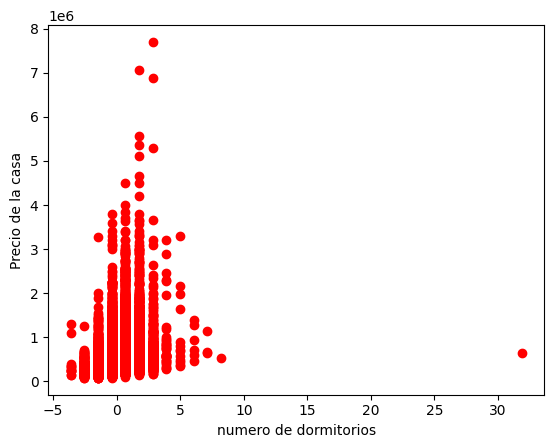

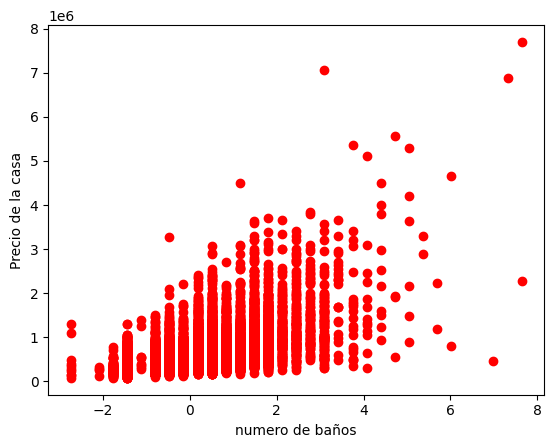

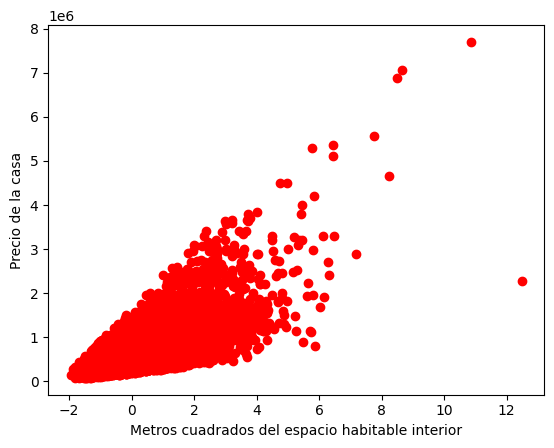

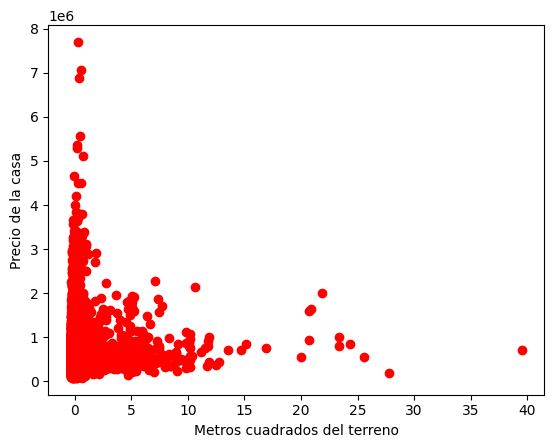

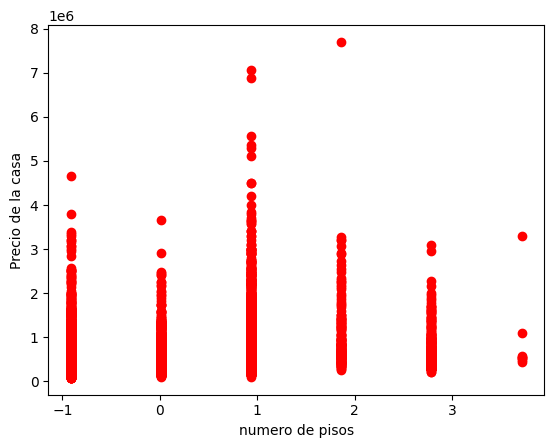

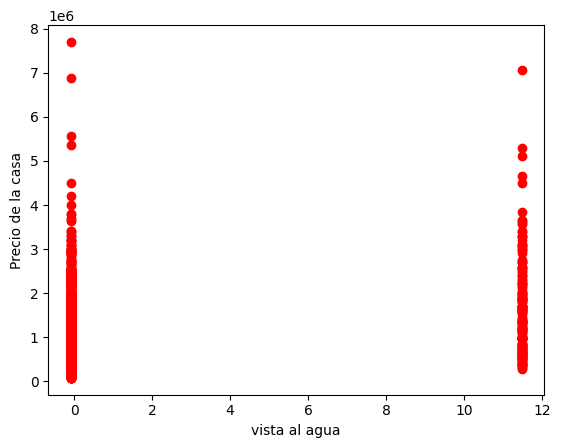

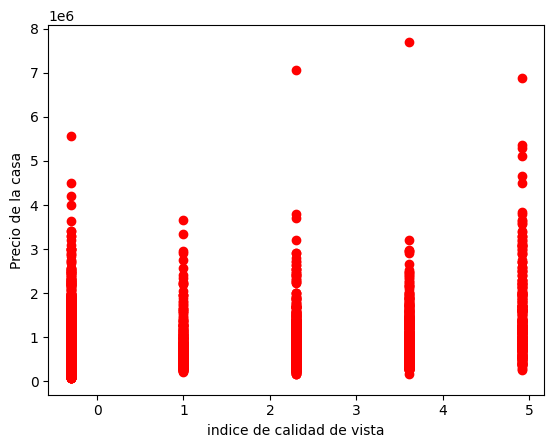

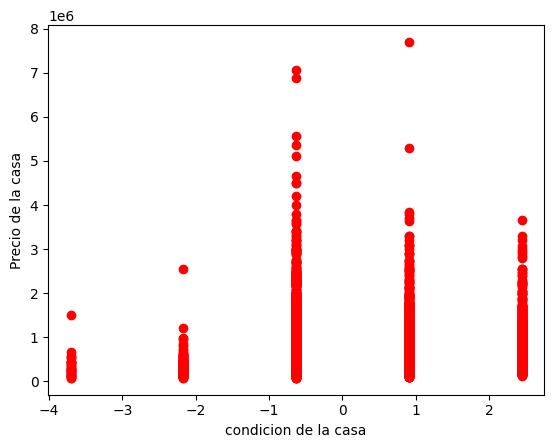

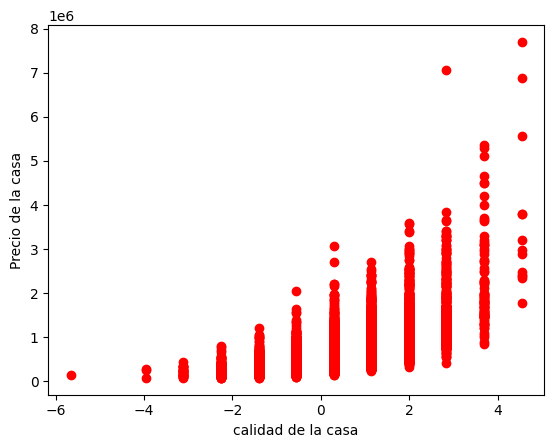

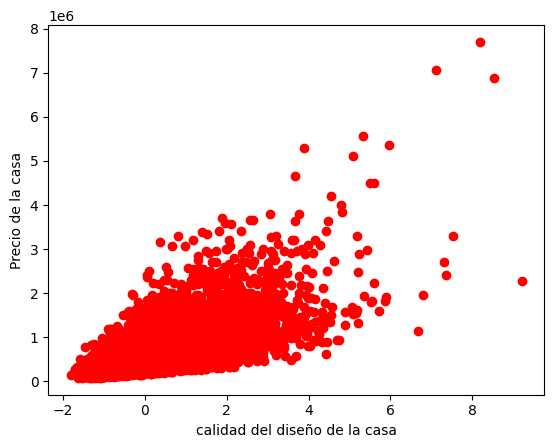

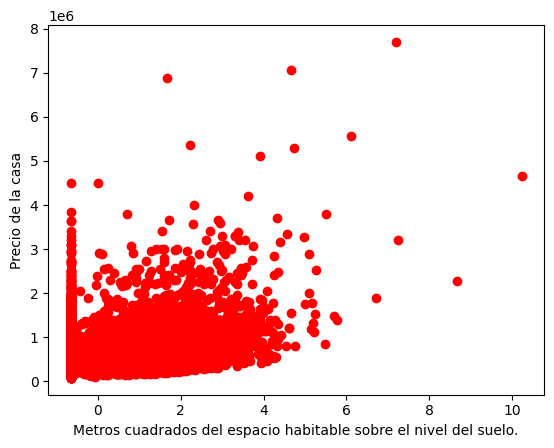

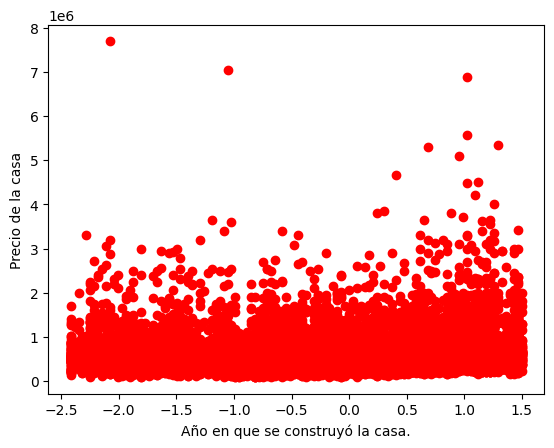

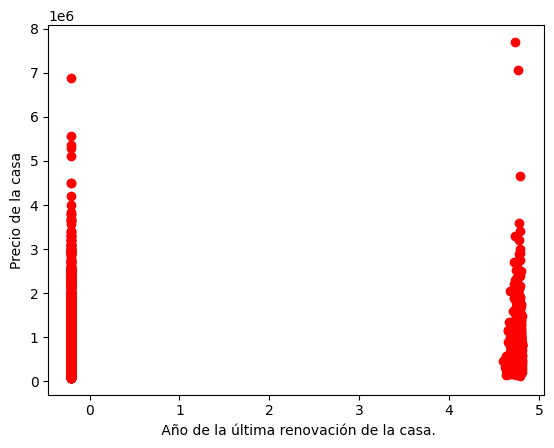

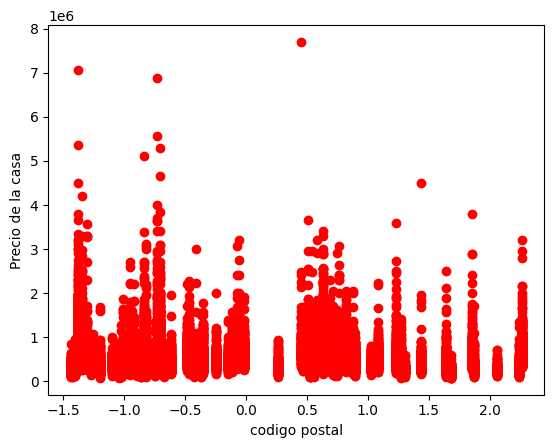

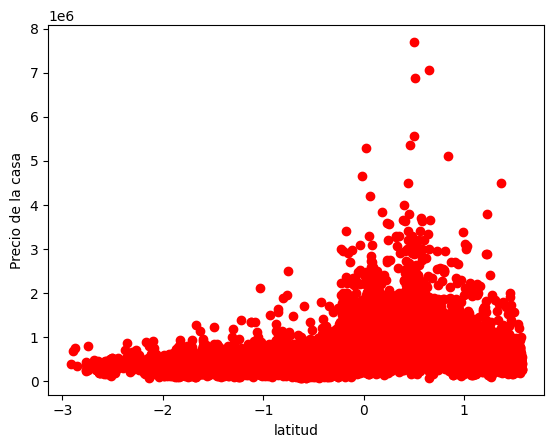

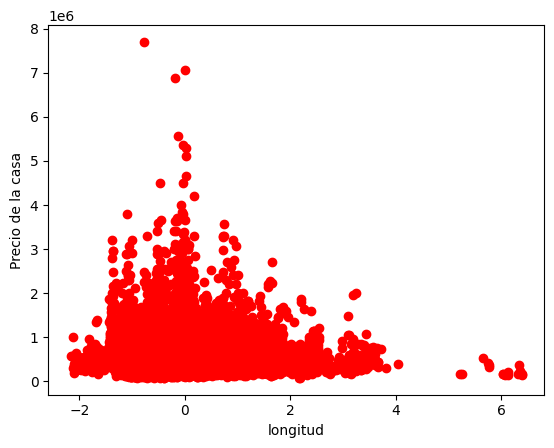

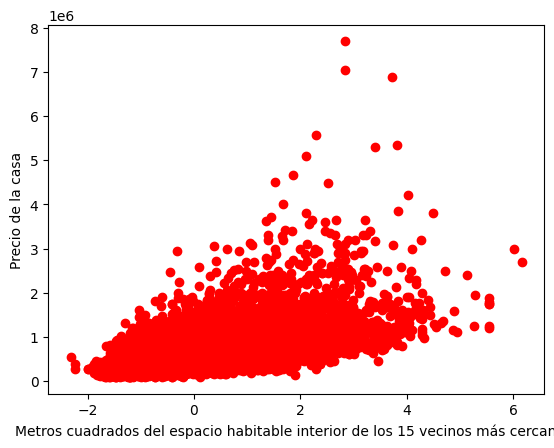

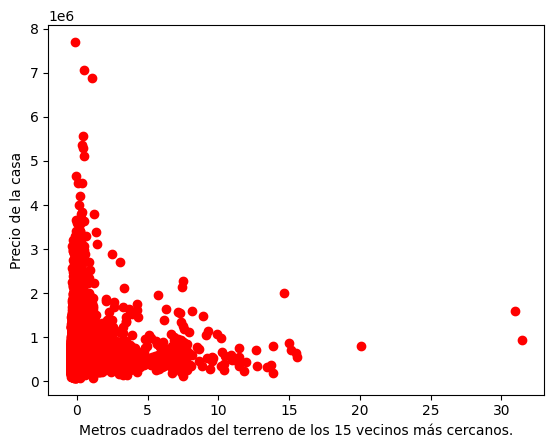

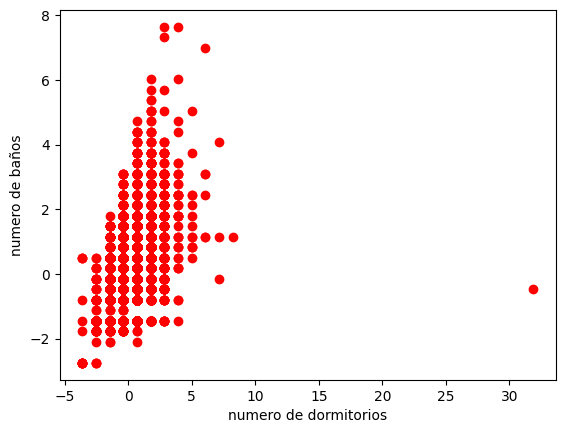

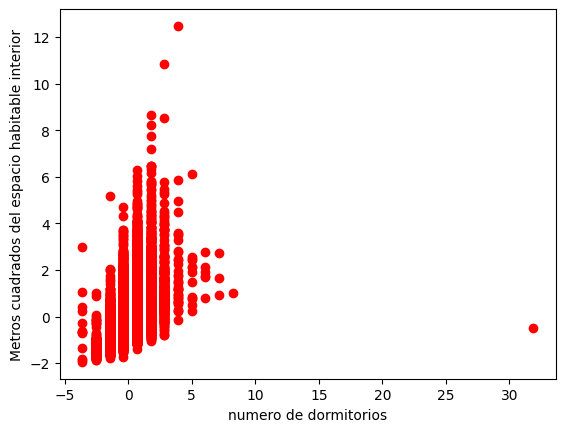

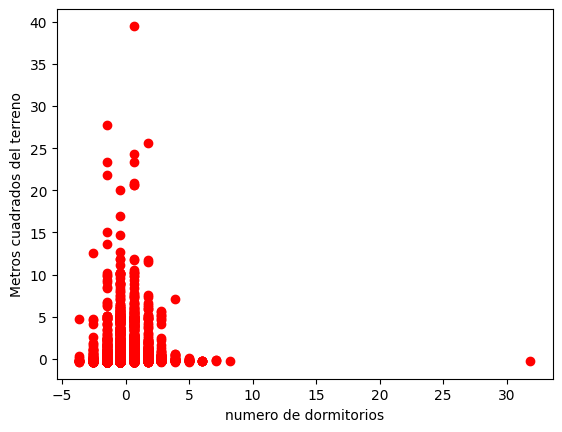

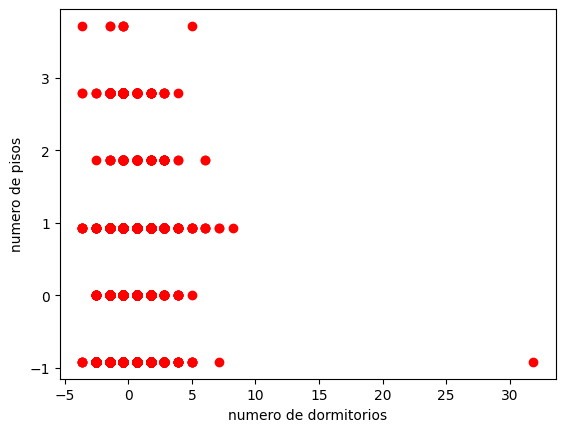

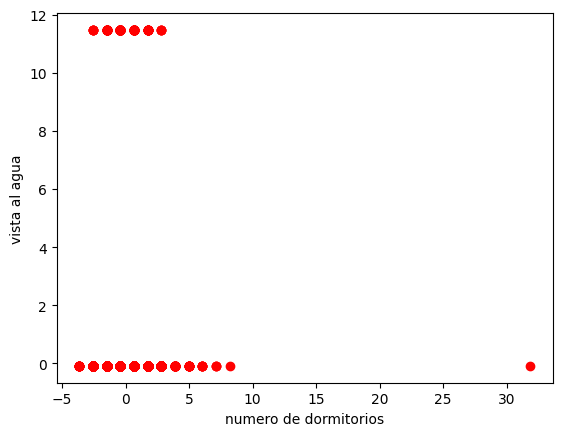

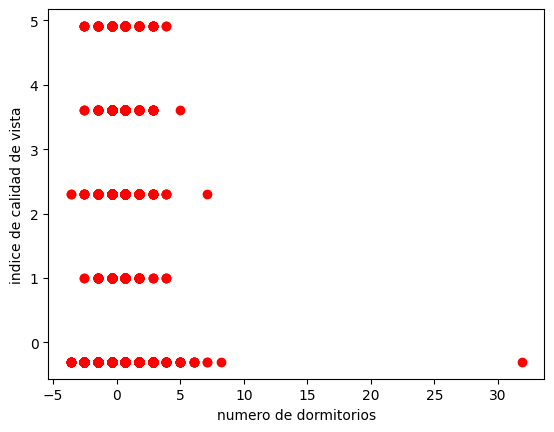

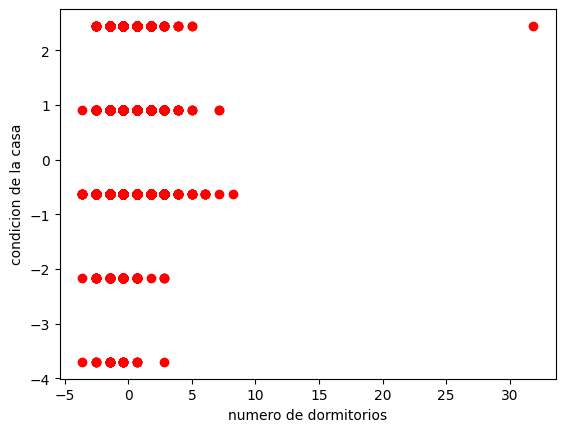

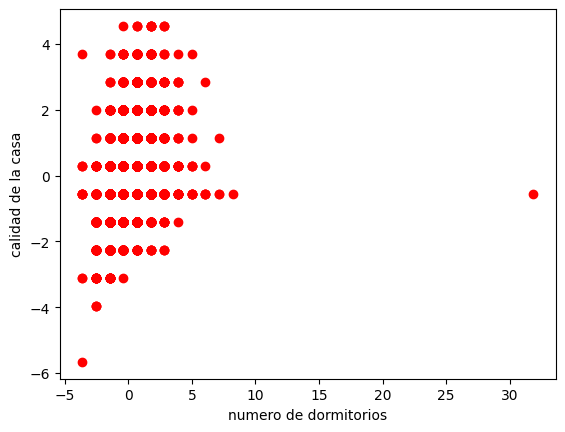

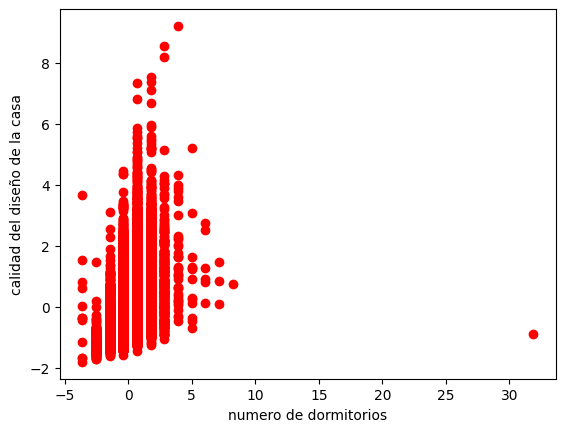

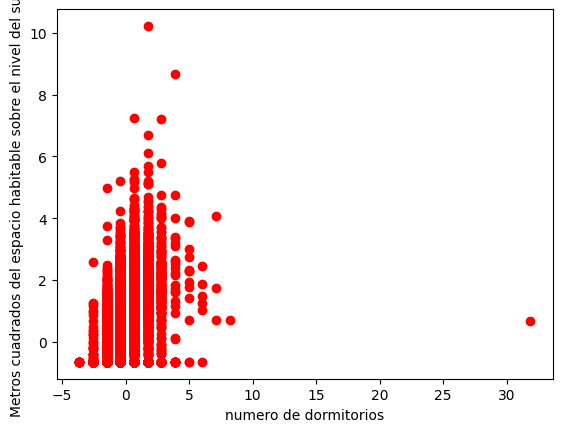

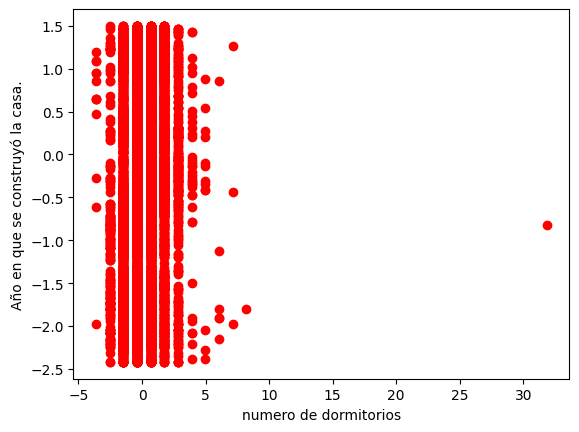

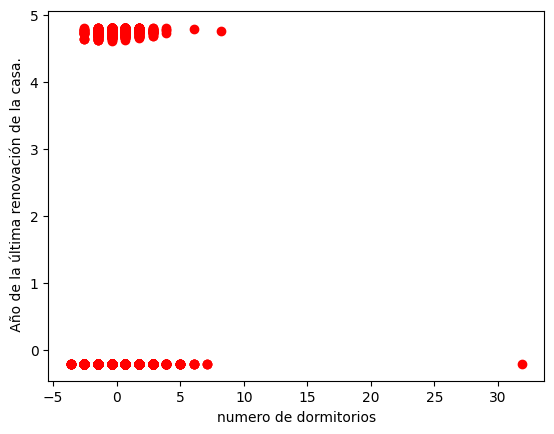

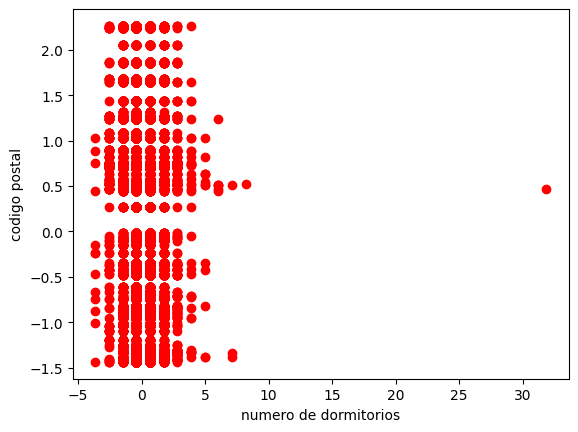

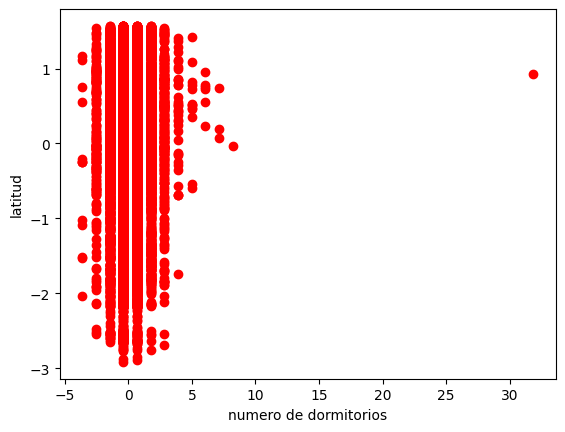

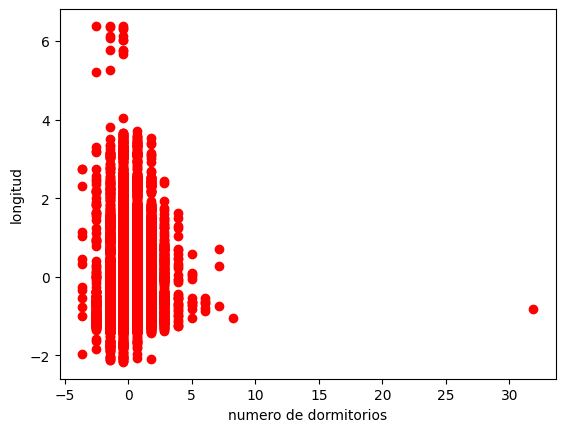

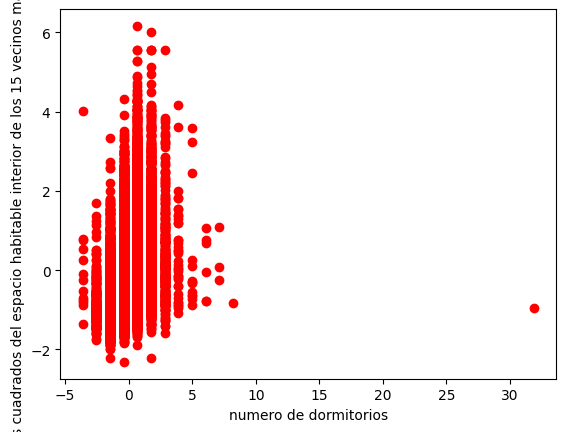

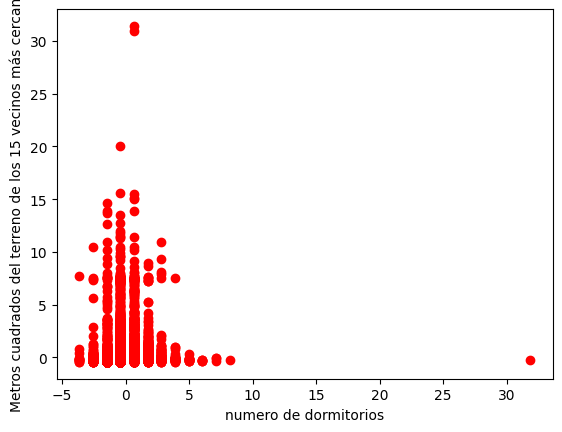

In [489]:
xlabel1 = 'numero de dormitorios'
xlabel2 = 'numero de baños'
xlabel3 = 'Metros cuadrados del espacio habitable interior'
xlabel4 = 'Metros cuadrados del terreno'
xlabel5 = 'numero de pisos'
xlabel6 = 'vista al agua'
xlabel7 = 'indice de calidad de vista'
xlabel8 = 'condicion de la casa'
xlabel9 = 'calidad de la casa'
xlabel10 = 'calidad del diseño de la casa'
xlabel11 = 'Metros cuadrados del espacio habitable sobre el nivel del suelo.'
xlabel12 = 'Año en que se construyó la casa.'
xlabel13 = ' Año de la última renovación de la casa.'
xlabel14 = 'codigo postal'
xlabel15 = 'latitud'
xlabel16 = 'longitud'
xlabel17 = 'Metros cuadrados del espacio habitable interior de los 15 vecinos más cercanos.'
xlabel18 = 'Metros cuadrados del terreno de los 15 vecinos más cercanos.'
ylabel1 = 'Precio de la casa'

graficarDatos(X_norm.iloc[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm.iloc[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm.iloc[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm.iloc[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm.iloc[:, 6], y, xlabel7, ylabel1)
graficarDatos(X_norm.iloc[:, 7], y, xlabel8, ylabel1)
graficarDatos(X_norm.iloc[:, 8], y, xlabel9, ylabel1)
graficarDatos(X_norm.iloc[:, 9], y, xlabel10, ylabel1)
graficarDatos(X_norm.iloc[:, 10], y, xlabel11, ylabel1)
graficarDatos(X_norm.iloc[:, 11], y, xlabel12, ylabel1)
graficarDatos(X_norm.iloc[:, 12], y, xlabel13, ylabel1)
graficarDatos(X_norm.iloc[:, 13], y, xlabel14, ylabel1)
graficarDatos(X_norm.iloc[:, 14], y, xlabel15, ylabel1)
graficarDatos(X_norm.iloc[:, 15], y, xlabel16, ylabel1)
graficarDatos(X_norm.iloc[:, 16], y, xlabel17, ylabel1)
graficarDatos(X_norm.iloc[:, 17], y, xlabel18, ylabel1)


graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 1], xlabel1, xlabel2)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 2], xlabel1, xlabel3)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 3], xlabel1, xlabel4)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 4], xlabel1, xlabel5)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 5], xlabel1, xlabel6)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 6], xlabel1, xlabel7)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 7], xlabel1, xlabel8)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 8], xlabel1, xlabel9)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 9], xlabel1, xlabel10)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 10], xlabel1, xlabel11)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 11], xlabel1, xlabel12)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 12], xlabel1, xlabel13)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 13], xlabel1, xlabel14)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 14], xlabel1, xlabel15)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 15], xlabel1, xlabel16)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 16], xlabel1, xlabel17)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 17], xlabel1, xlabel18)




# Añade el termino de interseccion a X (Columna de unos para X0)

In [490]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [491]:
print(X_ready)

[[ 1.         -0.39873715 -1.44746357 ... -0.30607896 -0.9433552
  -0.26071541]
 [ 1.         -0.39873715  0.1756067  ... -0.74634143 -0.43268619
  -0.18786773]
 [ 1.         -1.47395936 -1.44746357 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [ 1.         -1.47395936 -1.77207762 ... -0.60432128 -1.41025258
  -0.39414129]
 [ 1.         -0.39873715  0.50022075 ...  1.02891048 -0.8412214
  -0.42051149]
 [ 1.         -1.47395936 -1.77207762 ... -0.60432128 -1.41025258
  -0.41794772]]


In [492]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J


In [493]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

#  Elegir algun valor para alpha (probar varias alternativas)

los valores de theta calculados son: [530198.06073977 -25403.24041925  28913.61022497  75264.55523629
   4472.70929786   6527.40554349  49463.32639794  42028.52762337
  21988.0720891   96303.1222393   68990.52520047  27104.13604098
 -62261.88711361  13081.27392634 -20764.66349816  83131.06952949
 -29276.70272111  36609.01258731  -7999.64931184]
con un costo de: 20463240715.63119 
theta calculado por el descenso por el gradiente: [530198.06073977 -25403.24041925  28913.61022497  75264.55523629
   4472.70929786   6527.40554349  49463.32639794  42028.52762337
  21988.0720891   96303.1222393   68990.52520047  27104.13604098
 -62261.88711361  13081.27392634 -20764.66349816  83131.06952949
 -29276.70272111  36609.01258731  -7999.64931184]
El valor predecido es (usando el descenso por el gradiente): 203923.0989


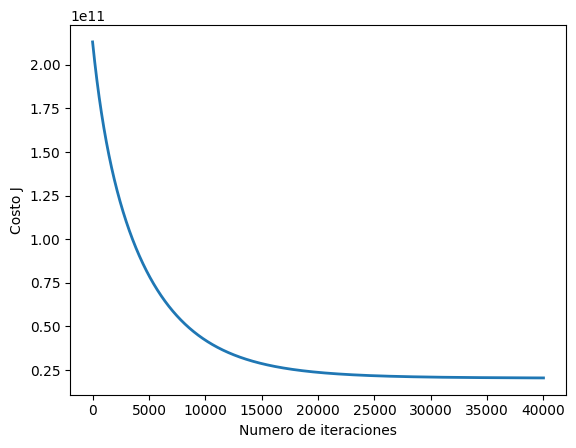

In [494]:
theta = np.zeros(19)

num_ite = 40000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 3,	1.00,	1180,	5650,	1.0,	0,	0,	3,	7,	1180,	0,	1955,	0,	98178,	47.5112,	-122.257,	1340,	5650]
X_array[1:19] = (X_array[1:19] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))


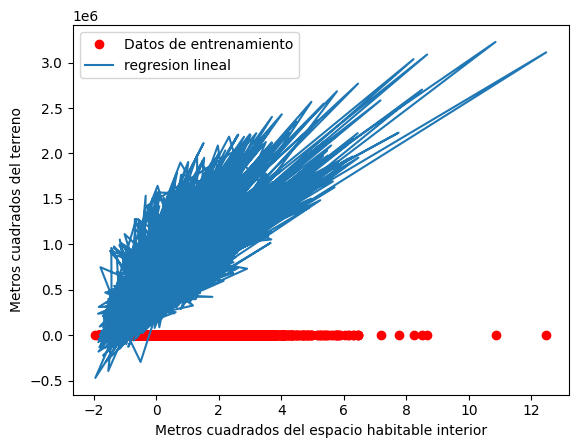

In [495]:
graficarDatos(X_ready[:, 3], X_ready[:, 4], xlabel3, xlabel4)

pyplot.plot(X_ready[:, 3], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [496]:
ranges = [
    (0, 10),  # rango para 'bedrooms'
    (0, 10),  # rango para 'bathrooms'
    (0, 10000),  # rango para 'sqft_living'
    (0, 100000),  # rango para 'sqft_lot'
    (0, 5),  # rango para 'floors'
    (0, 1),  # rango para 'waterfront'
    (0, 4),  # rango para 'view'
    (0, 5),  # rango para 'condition'
    (0, 13),  # rango para 'grade'
    (0, 10000),  # rango para 'sqft_above'
    (0, 10000),  # rango para 'sqft_basement'
    (1900, 2022),  # rango para 'yr_built'
    (0, 2022),  # rango para 'yr_renovated'
    (98000, 98199),  # rango para 'zipcode'
    (47.0, 48.0),  # rango para 'lat'
    (-123.0, -121.0),  # rango para 'long'
    (0, 10000),  # rango para 'sqft_living15'
    (0, 100000)  # rango para 'sqft_lot15'
]

# Generar 100 predicciones
predictions = []
for _ in range(101):
    valores_aleatorios = [np.random.uniform(*rango) for rango in ranges]
    X_random = [1] + valores_aleatorios  # Añadir el término de intersección
    X_random[1:] = (np.array(X_random[1:]) - mu) / sigma  # Normalizar
    y_pred = np.dot(X_random, theta)
    predictions.append(y_pred)
    print(f"Predicción {_ + 1}: ${y_pred:.2f}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)


Predicción 1: $2022230.07
Predicción 2: $2969555.34
Predicción 3: $2187262.05
Predicción 4: $1983435.70
Predicción 5: $1207118.31
Predicción 6: $1746890.72
Predicción 7: $1742837.69
Predicción 8: $1623581.62
Predicción 9: $2496818.20
Predicción 10: $859140.36
Predicción 11: $2081456.42
Predicción 12: $1654756.52
Predicción 13: $965930.99
Predicción 14: $1667517.15
Predicción 15: $2143537.16
Predicción 16: $2309872.24
Predicción 17: $2406643.87
Predicción 18: $1987396.48
Predicción 19: $2454967.14
Predicción 20: $2228784.40
Predicción 21: $2661312.16
Predicción 22: $1902587.87
Predicción 23: $1549252.20
Predicción 24: $2586489.83
Predicción 25: $1927511.41
Predicción 26: $2100033.78
Predicción 27: $2385865.60
Predicción 28: $1439623.37
Predicción 29: $719085.12
Predicción 30: $2328877.74
Predicción 31: $1468245.89
Predicción 32: $448819.82
Predicción 33: $2084261.18
Predicción 34: $1295840.87
Predicción 35: $2159992.86
Predicción 36: $2387297.54
Predicción 37: $1793442.73
Predicción 38:

In [497]:
def calcularThethaEcuacionNormal(X, y):
    # Usar la pseudoinversa en lugar de la inversa
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
    return theta

In [498]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [499]:
theta = calcularThethaEcuacionNormal(X_ren, y)
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [ 7.25457900e+01 -3.55112088e+04  4.10549074e+04  1.10264270e+02
  1.33383082e-01  5.26155694e+03  5.83295392e+05  5.23552269e+04
  2.72094261e+04  9.54805264e+04  7.13926671e+01  3.88713176e+01
 -2.56179597e+03  2.04186925e+01 -5.19076328e+02  6.02189074e+05
 -2.17900343e+05  2.30994310e+01 -3.76111350e-01]


# Aqui se define los rangos para los valores aleatorios

In [500]:
ranges = [
    (0, 10),  # rango para 'bedrooms'
    (0, 10),  # rango para 'bathrooms'
    (0, 10000),  # rango para 'sqft_living'
    (0, 100000),  # rango para 'sqft_lot'
    (0, 5),  # rango para 'floors'
    (0, 1),  # rango para 'waterfront'
    (0, 4),  # rango para 'view'
    (0, 5),  # rango para 'condition'
    (0, 13),  # rango para 'grade'
    (0, 10000),  # rango para 'sqft_above'
    (0, 10000),  # rango para 'sqft_basement'
    (1900, 2022),  # rango para 'yr_built'
    (0, 2022),  # rango para 'yr_renovated'
    (98000, 98199),  # rango para 'zipcode'
    (47.0, 48.0),  # rango para 'lat'
    (-123.0, -121.0),  # rango para 'long'
    (0, 10000),  # rango para 'sqft_living15'
    (0, 100000)  # rango para 'sqft_lot15'
]

predictions = []
for _ in range(101):
    valores_aleatorios = [np.random.uniform(*r) for r in ranges]
    X_array = [1] + valores_aleatorios  # Agregar el término de sesgo (bias)
    price = np.dot(X_array, theta)
    predictions.append(price)
    print(f"El precio de la casa numero {_ + 1} es: ${price}")

predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)


El precio de la casa numero 1 es: $1374963.2739520972
El precio de la casa numero 2 es: $1355450.21376432
El precio de la casa numero 3 es: $1965940.0313609943
El precio de la casa numero 4 es: $756339.220022275
El precio de la casa numero 5 es: $2891529.6021277118
El precio de la casa numero 6 es: $1707987.3056332543
El precio de la casa numero 7 es: $2653109.340532477
El precio de la casa numero 8 es: $1468113.4224545604
El precio de la casa numero 9 es: $1271787.464172706
El precio de la casa numero 10 es: $1758294.7287299447
El precio de la casa numero 11 es: $1941713.657380023
El precio de la casa numero 12 es: $939673.2900165262
El precio de la casa numero 13 es: $536809.8682880013
El precio de la casa numero 14 es: $273055.261980932
El precio de la casa numero 15 es: $1223638.4686939109
El precio de la casa numero 16 es: $1183078.5974003244
El precio de la casa numero 17 es: $2560316.5320131113
El precio de la casa numero 18 es: $1679301.8775075672
El precio de la casa numero 19

## Regresion polinomica descenso por el gradiente

In [501]:
# Cargar el dataset
data = pd.read_csv('./kc_house_data.csv')

# Eliminar todas las columnas a excepción de "sqft_living" y "price"
data = data[['sqft_living', 'price']]
data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [502]:
# Cargar datos
X = data.iloc[:, 0].values.reshape(-1, 1)  # Asegurarse de que X es un array 2D
y = data.iloc[:, 1].values


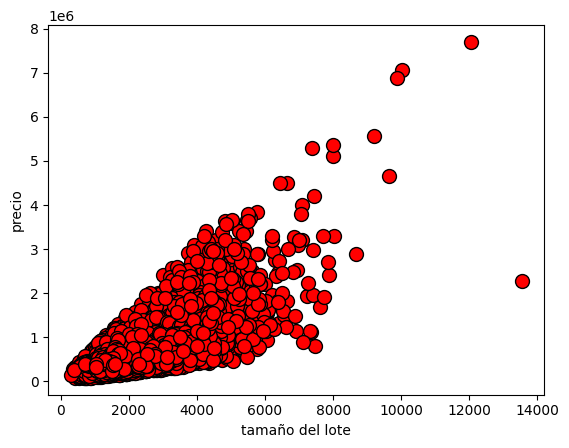

In [503]:
def plotData(x, y):
    # Grafica los puntos x e y en una figura nueva.
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('precio')
    pyplot.xlabel('tamaño del lote')

plotData(X, y)


In [504]:
# Concatenar X con X^2
X = np.concatenate([X, X * X], axis=1)

In [505]:
print(X)

[[   1180 1392400]
 [   2570 6604900]
 [    770  592900]
 ...
 [   1020 1040400]
 [   1600 2560000]
 [   1020 1040400]]


In [506]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [507]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [508]:
print(X_norm)

[[-0.97983502 -0.69860125]
 [ 0.53363434  0.26549307]
 [-1.42625404 -0.84647528]
 ...
 [-1.15404732 -0.76370652]
 [-0.52252773 -0.48264412]
 [-1.15404732 -0.76370652]]


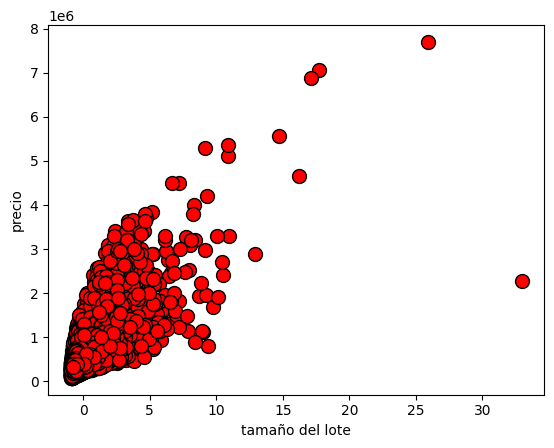

In [509]:
plotData(X_norm[:,1], y)

In [510]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [511]:
print(X)

[[ 1.         -0.97983502 -0.69860125]
 [ 1.          0.53363434  0.26549307]
 [ 1.         -1.42625404 -0.84647528]
 ...
 [ 1.         -1.15404732 -0.76370652]
 [ 1.         -0.52252773 -0.48264412]
 [ 1.         -1.15404732 -0.76370652]]


In [512]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [513]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [540087.87134335  91413.07468621 179628.59055664]
El valor predecido es (usando el descenso por el gradiente): 723685.0579


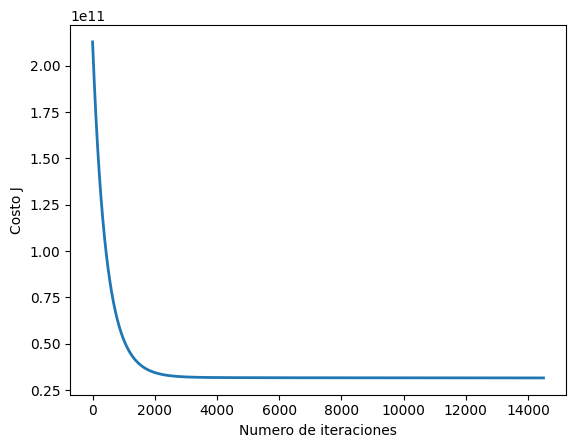

In [514]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 14500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 5650, 117]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

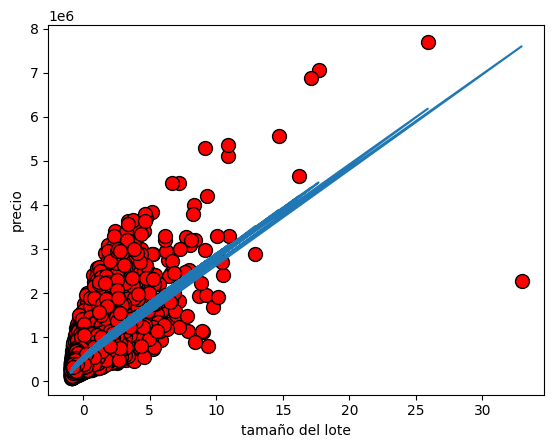

In [515]:
plotData(X_norm[:, 1], y)
pyplot.plot(X_norm[:, 1], np.dot(X, theta), '-')

In [516]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [517]:
X_array[1:3]
print(np.dot(X_array, theta))

163626.48328269884


## Predicciones
para 100 valores

In [519]:
range1 = (min(X), max(X))
predictions = []
for _ in range(101):
    valor_aleatorio = np.random.uniform(*range1)
    X_random = [1, valor_aleatorio, valor_aleatorio**2]
    X_random[1:3] = (X_random[1:3] - mu) / sigma
    y_pred = np.dot(X_random, theta)
    predictions.append(y_pred)
    print(f"Predicción {_ + 1}: ${y_pred:.2f}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)

Predicción 1: $575130.34
Predicción 2: $972461.88
Predicción 3: $520651.52
Predicción 4: $920748.92
Predicción 5: $810187.39
Predicción 6: $696752.39
Predicción 7: $974916.45
Predicción 8: $865401.02
Predicción 9: $977125.52
Predicción 10: $973625.73
Predicción 11: $38312.01
Predicción 12: $907216.69
Predicción 13: $966656.84
Predicción 14: $890257.39
Predicción 15: $91081.37
Predicción 16: $635057.40
Predicción 17: $678437.96
Predicción 18: $869089.07
Predicción 19: $663277.74
Predicción 20: $971802.83
Predicción 21: $844006.01
Predicción 22: $244431.90
Predicción 23: $838568.39
Predicción 24: $735206.82
Predicción 25: $546994.27
Predicción 26: $739593.07
Predicción 27: $977391.62
Predicción 28: $686598.13
Predicción 29: $482396.20
Predicción 30: $977117.33
Predicción 31: $610823.71
Predicción 32: $736403.47
Predicción 33: $659008.61
Predicción 34: $956112.77
Predicción 35: $67463.95
Predicción 36: $977972.56
Predicción 37: $689678.76
Predicción 38: $308520.62
Predicción 39: $740961.7

## Regresion lineal polinomica por ecuacion de la normal

In [520]:
# Cargar el dataset
data = pd.read_csv('./kc_house_data.csv')

# Eliminar todas las columnas a excepción de "sqft_living" y "price"
data = data[['sqft_living', 'price']]
data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [521]:
# Cargar datos
X = data.iloc[:, 0].values.reshape(-1, 1)  # Asegurarse de que X es un array 2D
y = data.iloc[:, 1].values

In [522]:
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [523]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [526]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 4523, 1156]
price = np.dot(X_array, theta)

print('El precio de la casa es: ${:.2f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [1.99222279e+05 6.79940947e+01 3.85812609e-02]
El precio de la casa es: $506804.17


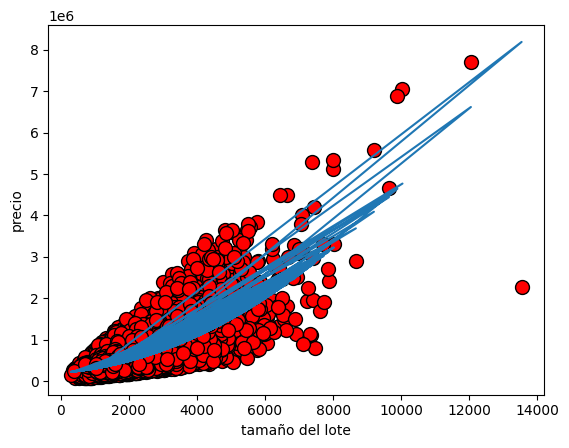

In [527]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')

El grafico determina que no es viable usar una curva para ajustar los datos, porque son proporcionales, como se ve en la imagen no hay un problema grave en cuanto a datos dispersos para realizar curvas por lo que una regresion linean simple o multiple es viable